In [5]:
import pandas as pd
# Configurar Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)



In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/leandric/DATATHON-FIAP/refs/heads/main/data/base_tratada.csv')

In [7]:
df.head()

,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,NOME,ano,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA
0,Escola Pública,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,ALUNO-1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALUNO-2,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,ALUNO-3,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,ALUNO-4,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Escola Pública,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,ALUNO-5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
columns = [
    'NOME',
    'ano',
    'ANOS_PM',
    'INSTITUICAO_ENSINO_ALUNO',
    'INDE',
    'PEDRA',
    'IEG',
    'IDA',
    'IPV',
    'IAA' ,
    'PONTO_VIRADA'
]

In [20]:
df[columns].head()

,NOME,ano,ANOS_PM,INSTITUICAO_ENSINO_ALUNO,INDE,PEDRA,IEG,IDA,IPV,IAA,PONTO_VIRADA
0,ALUNO-1,2020,2,Escola Pública,7.883752,Ametista,8.7,7,7.75,8.500020000000001,Não
1,ALUNO-2,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-3,2020,2,Escola Pública,7.856389666666666,Ametista,8.9,5.5,8.111113333333334,7.91667,Não
3,ALUNO-4,2020,2,Escola Pública,5.076252,Quartzo,4.1,0,7.75,8.000020000000001,Não
4,ALUNO-5,2020,1,Escola Pública,8.077085,Ametista,8,7.5,8.166665,7.50002,Não


<Axes: >

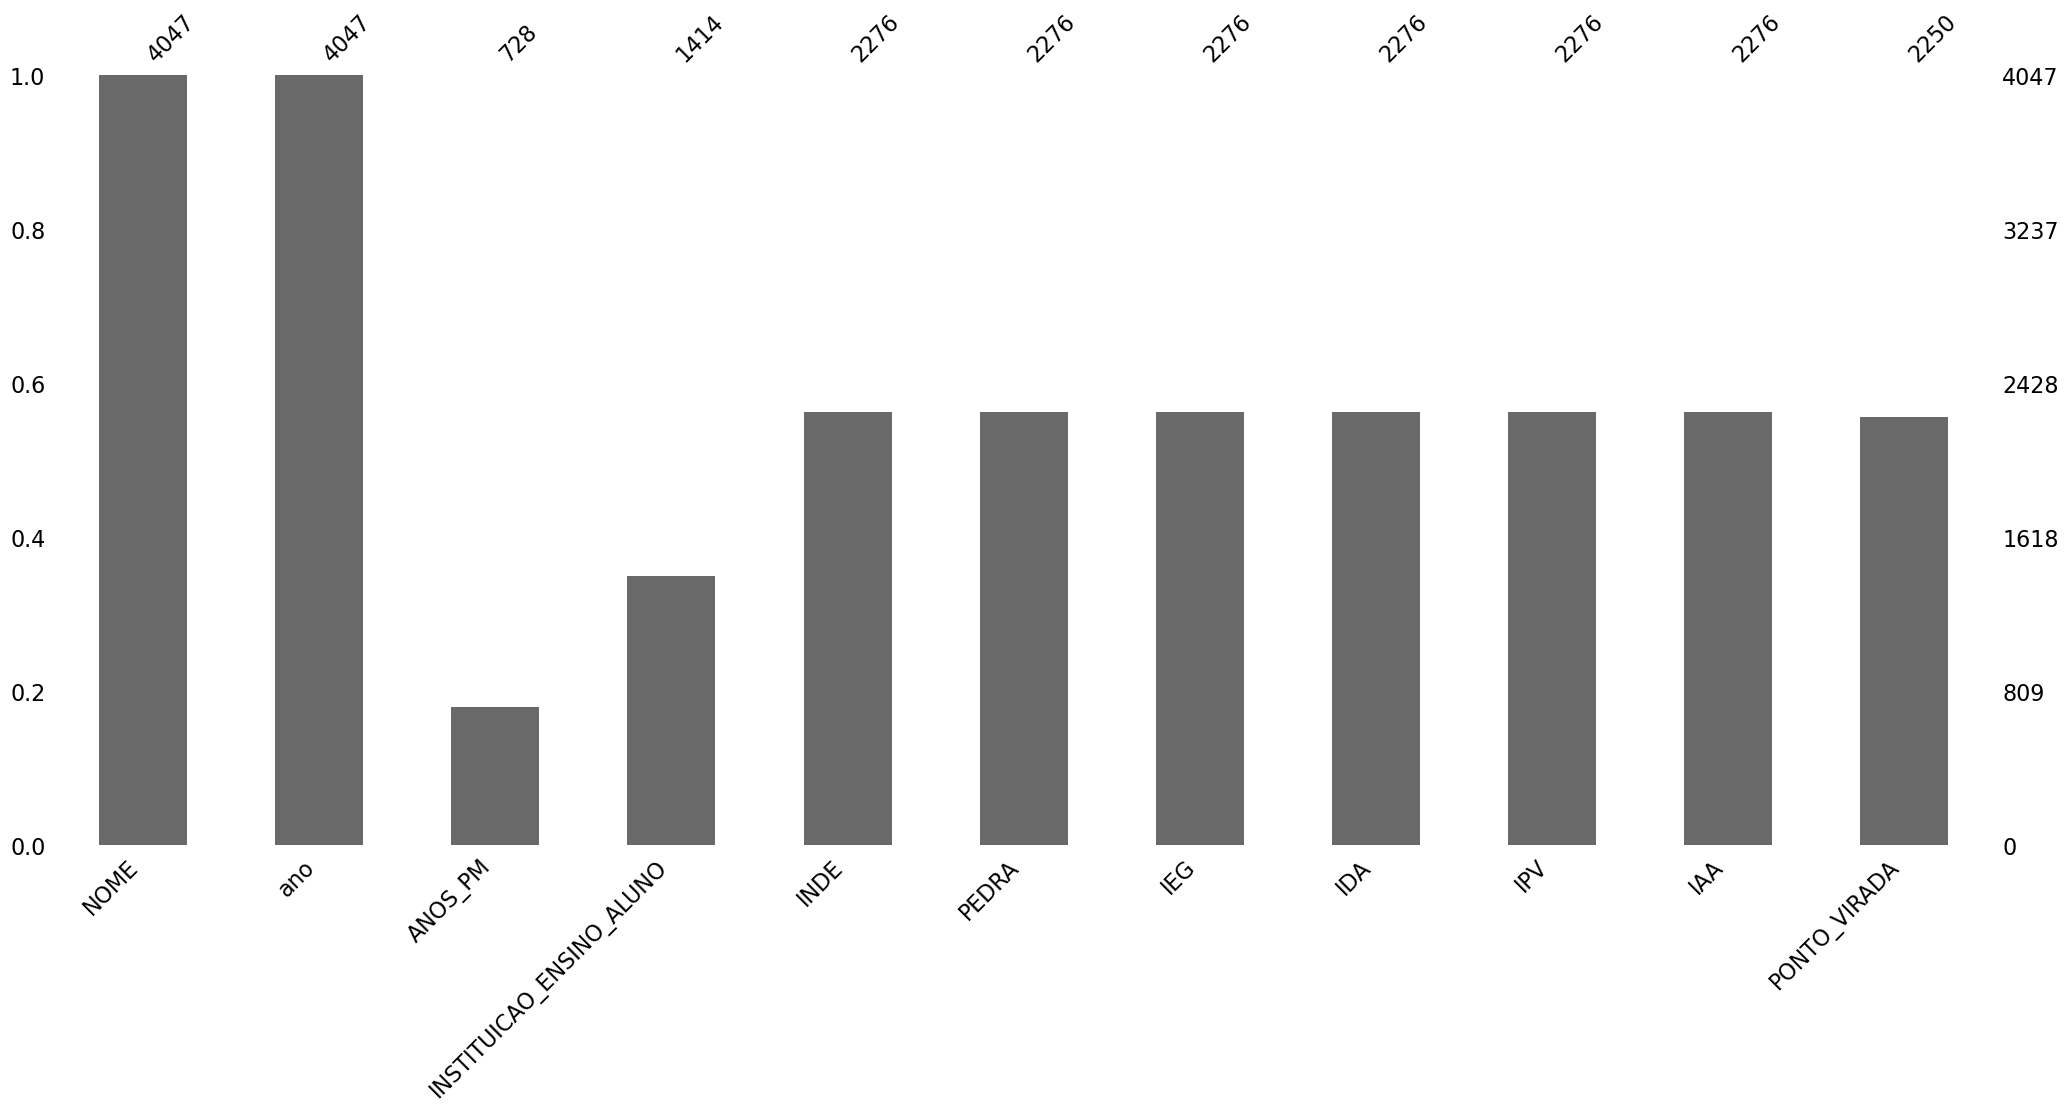

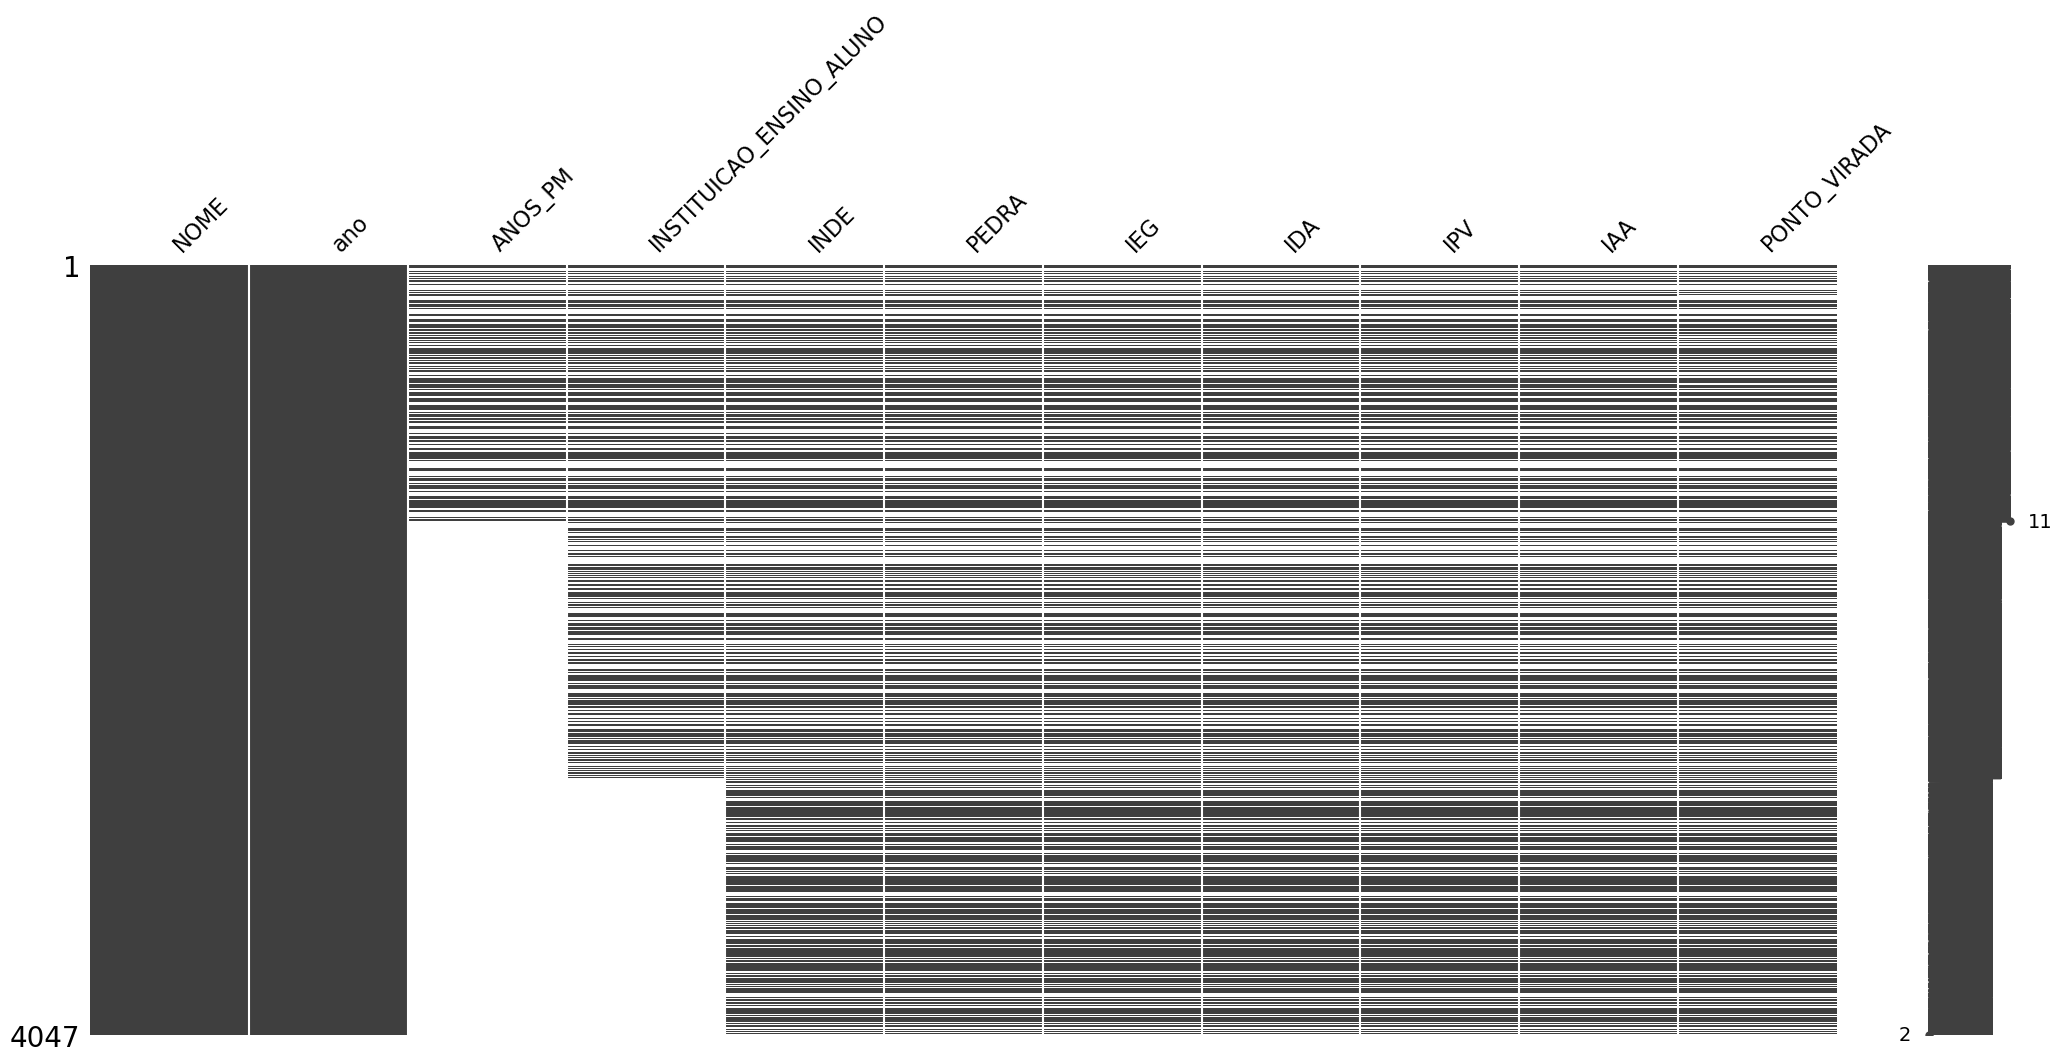

In [21]:

import missingno as msno

# Gráfico de barras mostrando a quantidade de nulos por coluna
msno.bar(df[columns])

# Alternativamente, um gráfico de matriz pode ser usado para uma visualização mais detalhada
msno.matrix(df[columns])

In [23]:
# Deletar as linhas que têm NaN na coluna 'PONTO_VIRADA'
df = df.dropna(subset=['PONTO_VIRADA'])

In [25]:
df[columns]

,NOME,ano,ANOS_PM,INSTITUICAO_ENSINO_ALUNO,INDE,PEDRA,IEG,IDA,IPV,IAA,PONTO_VIRADA
0,ALUNO-1,2020,2,Escola Pública,7.883752,Ametista,8.7,7,7.75,8.500020000000001,Não
2,ALUNO-3,2020,2,Escola Pública,7.856389666666666,Ametista,8.9,5.5,8.111113333333334,7.91667,Não
3,ALUNO-4,2020,2,Escola Pública,5.076252,Quartzo,4.1,0,7.75,8.000020000000001,Não
4,ALUNO-5,2020,1,Escola Pública,8.077085,Ametista,8,7.5,8.166665,7.50002,Não
7,ALUNO-8,2020,3,Rede Decisão/União,8.381390666666666,Ametista,9.9,7.333333333333333,8.94445,8.33334,Sim
...,...,...,...,...,...,...,...,...,...,...,...
4039,ALUNO-1342,2022,NaN,NaN,8.150001333333332,Topázio,9.666666666666666,7.75,7.5,7.916679999999999,Não
4040,ALUNO-1343,2022,NaN,NaN,5.674643736192333,Quartzo,6.470435347628331,2.0,7.444443333333333,7.416679999999999,Não
4043,ALUNO-1346,2022,NaN,NaN,8.135537771280053,Topázio,9.03183885640026,9.0,9.08334,9.000020000000001,Sim
4045,ALUNO-1348,2022,NaN,NaN,6.749980560606062,Ágata,9.178030303030305,5.900000000000001,5.8333275,8.33334,Não
